In [23]:
import xarray as xr
import numpy as np

In [24]:
ds_obs = xr.open_zarr('/glade/p/cgd/oce/projects/krill-cesm-le/data/oisst-avhrr-v02r01.1990-2019_DJF.POP_gx1v6.zarr')
ds_obs = ds_obs.isel(nlat=slice(0, 93))
ds_obs

,Array,Chunk
Bytes,6.90 MB,238.08 kB
Shape,"(29, 93, 320)","(1, 93, 320)"
Count,59 Tasks,29 Chunks
Type,float64,numpy.ndarray
,Array,Chunk
Bytes,6.90 MB,238.08 kB
Shape,"(29, 93, 320)","(1, 93, 320)"
Count,59 Tasks,29 Chunks
Type,float64,numpy.ndarray
,Array,Chunk


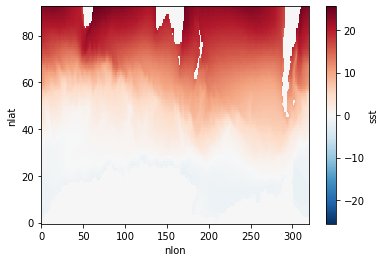

In [25]:
sst_obs_mean = ds_obs.sst.mean('time')
sst_obs_mean.plot()

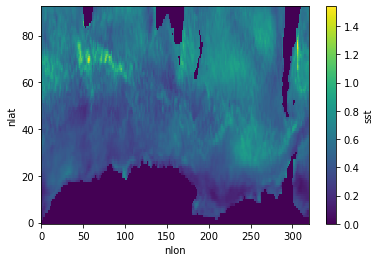

In [26]:
sst_obs_std = ds_obs.sst.std('time')
sst_obs_std.plot()

In [27]:
ds_mod = xr.open_zarr('/glade/p/cgd/oce/projects/krill-cesm-le/data/cesm-le-fields-djf.zarr')
ds_mod

<xarray.Dataset>
Dimensions:        (length: 3, member_id: 34, nlat: 93, nlon: 320, time: 180, z_t: 60, z_t_150m: 15)
Coordinates:
    KMT            (nlat, nlon) float64 dask.array<chunksize=(93, 320), meta=np.ndarray>
    TAREA          (nlat, nlon) float64 dask.array<chunksize=(93, 320), meta=np.ndarray>
    TLAT           (nlat, nlon) float64 dask.array<chunksize=(93, 320), meta=np.ndarray>
    TLONG          (nlat, nlon) float64 dask.array<chunksize=(93, 320), meta=np.ndarray>
    ULAT           (nlat, nlon) float64 dask.array<chunksize=(93, 320), meta=np.ndarray>
    ULONG          (nlat, nlon) float64 dask.array<chunksize=(93, 320), meta=np.ndarray>
    dz             (z_t) float32 dask.array<chunksize=(60,), meta=np.ndarray>
  * length         (length) float64 20.0 40.0 60.0
  * member_id      (member_id) int64 1 2 9 10 11 12 ... 35 101 102 103 104 105
  * time           (time) int64 1921 1922 1923 1924 1925 ... 2097 2098 2099 2100
  * z_t            (z_t) float32 500.0 1500.0 2500.0 ... 512502.8 537500.0
  * z_t_150m       (z_t_150m) float32 500.0 1500.0 2500.0 ... 13500.0 14500.0
Dimensions without coordinates: nlat, nlon
Data variables:
    Chl_surf       (time, member_id, nlat, nlon) float64 dask.array<chunksize=(180, 1, 93, 320), meta=np.ndarray>
    IFRAC          (time, member_id, nlat, nlon) float64 dask.array<chunksize=(180, 1, 93, 320), meta=np.ndarray>
    Jint_100m_DIC  (time, member_id, nlat, nlon) float64 dask.array<chunksize=(180, 1, 93, 320), meta=np.ndarray>
    KGP            (time, length, member_id, nlat, nlon) float64 dask.array<chunksize=(180, 3, 1, 93, 320), meta=np.ndarray>
    NPP            (time, member_id, nlat, nlon) float64 dask.array<chunksize=(180, 1, 93, 320), meta=np.ndarray>
    SST            (time, member_id, nlat, nlon) float64 dask.array<chunksize=(180, 1, 93, 320), meta=np.ndarray>

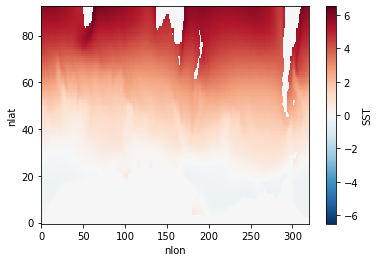

In [28]:
sst_mod_mean = ds_mod.SST.mean(dim=['member_id', 'time'])
sst_mod_mean.plot()

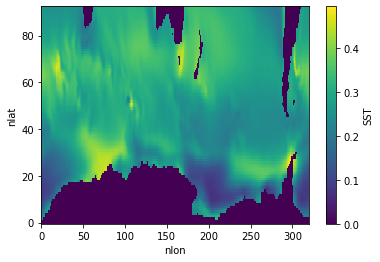

In [29]:
sst_mod_std = ds_mod.SST.std(dim=['member_id', 'time'])
sst_mod_std.plot()

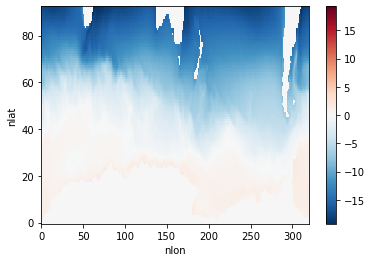

In [30]:
sst_bias = sst_mod_mean - sst_obs_mean
sst_bias.plot()

In [34]:
sst_mod_trans = sst_obs_std * (ds_mod.SST - sst_mod_mean) / sst_mod_std + sst_obs_mean
sst_mod_trans

<xarray.DataArray (nlat: 93, nlon: 320, time: 180, member_id: 34)>
dask.array<add, shape=(93, 320, 180, 34), dtype=float64, chunksize=(93, 320, 180, 1), chunktype=numpy.ndarray>
Coordinates:
    KMT        (nlat, nlon) float64 dask.array<chunksize=(93, 320), meta=np.ndarray>
    TAREA      (nlat, nlon) float64 dask.array<chunksize=(93, 320), meta=np.ndarray>
    TLAT       (nlat, nlon) float64 dask.array<chunksize=(93, 320), meta=np.ndarray>
    TLONG      (nlat, nlon) float64 dask.array<chunksize=(93, 320), meta=np.ndarray>
    ULAT       (nlat, nlon) float64 dask.array<chunksize=(93, 320), meta=np.ndarray>
    ULONG      (nlat, nlon) float64 dask.array<chunksize=(93, 320), meta=np.ndarray>
  * member_id  (member_id) int64 1 2 9 10 11 12 13 ... 34 35 101 102 103 104 105
  * time       (time) int64 1921 1922 1923 1924 1925 ... 2097 2098 2099 2100
Dimensions without coordinates: nlat, nlon

/glade/work/mclong/miniconda3/envs/krill/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/glade/work/mclong/miniconda3/envs/krill/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


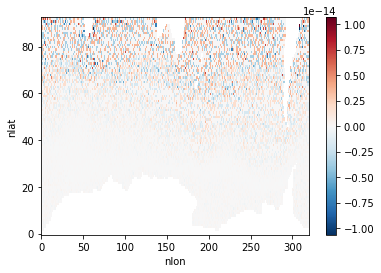

In [35]:
(sst_mod_trans.mean(dim=['member_id', 'time']) - sst_obs_mean).plot()

/glade/work/mclong/miniconda3/envs/krill/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/glade/work/mclong/miniconda3/envs/krill/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


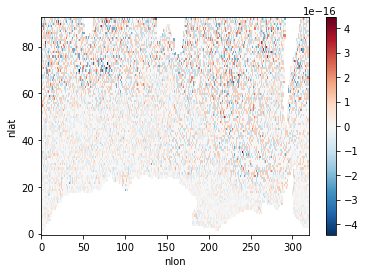

In [36]:
(sst_mod_trans.std(dim=['member_id', 'time']) - sst_obs_std).plot()